# LCLS-II Exercise
### ***Special thanks to Irene Wang and Aditya Thapa for the LCLS-II input files!***

In [3]:
from genesis.version4 import Genesis4

## Scanning parameters

In the last notebook, we ran a base line LCLS-II simulation.
In this notebook, you will scan a parameter and plot how the performance changes.

<div class="alert alert-block alert-info">

Using the LCLS-II lattice file, try scanning some of the following:
- Peak current
- Energy spread
- Tapering

How does the performance change?
<div>

In [4]:
G = Genesis4("examples/lcls-II.in")
G.verbose = True
G.input

Genesis4Input(
  main=MainInput(
    namelists=[
      Setup(
        rootname='lcls-II',
        lattice='lcls-II.lat',
        beamline='FEL',
        gamma0=6862.0,
        lambda0=3e-09,
        delz=0.039,
        nbins=8,
        shotnoise=False,
      ),
      LatticeNamelist(zmatch=9.0),
      Field(power=4000.0, waist_size=3e-05, dgrid=0.0002, ngrid=255),
      Beam(delgam=1.0, ex=1.2e-06, ey=1.24e-06),
      Write(beam='beginning'),
      Track(),
      Write(beam='end'),
    ],
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/lcls-II.in'),
  ),
  lattice=Lattice(
    elements={
      'D1': Drift(L=0.5),
      'D2': Drift(L=0.45),
      'QF': Quadrupole(L=0.1, k1=3.1),
      'QD': Quadrupole(L=0.1, k1=-3.1),
      'UND': Undulator(aw=2.5, lambdau=0.039, nwig=87),
      'FODO': Line(elements=['D1', 'UND', 'D2', 'QF', 'D2', 'UND', 'D2', 'QD', 'D2']),
      'FEL': Line(elements=[DuplicatedLineItem(label='FODO', count=10)]),
    },
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/lcls-II.lat'),
  ),
  source_path=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples'),
)

In [9]:
G.input.main.beam.current

1000.0

In [10]:
G_test = G

In [11]:
G_test.input.main.beam.current = 2000

In [12]:
G_test.input.main.beam.current

2000.0

In [3]:
output = G.run()

Configured to run in: /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T/tmpbuomc9iw
Running Genesis4 in /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T/tmpbuomc9iw
/Users/aaditya/opt/anaconda3/envs/fel2024/bin/genesis4 -l lcls-II.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-06-10 16:26:41 [UTC] from Git Commit ID: 
Starting Time: Mon Aug 12 02:40:56 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file lcls-II.lat ...
Matching for periodic solution between z = 0 and z = 9 :
   betax (m) : 2.94989
   alphax    : -0.4868
   phix (deg): 87.595
   betay (m) : 13.9016
   alphay    : 2.17265
   phiy (deg): 92.2785
Generating input radiation field for HARM = 1 ...


[PC100405:69045] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/3874422784/sm_segment.PC100405.1062988918.e6ef0000.0 could be created.


Generating input particle distribution...
Writing particle distribution to file: beginning.par.h5 ...

Running Core Simulation...
Steady-state run
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
  Calculation: 10% done
  Calculation: 20% done
  Calculation: 30% done
  Calculation: 40% done
  Calculation: 50% done
  Calculation: 60% done
  Calculation: 70% done
  Calculation: 80% done
  Calculation: 90% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...

Program is terminating...
Ending Time: Mon Aug 12 02:41:07 2024
Total Wall Clock Time: 10.5167 seconds
-------------------------------------
Success - execution took 10.77s.


<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

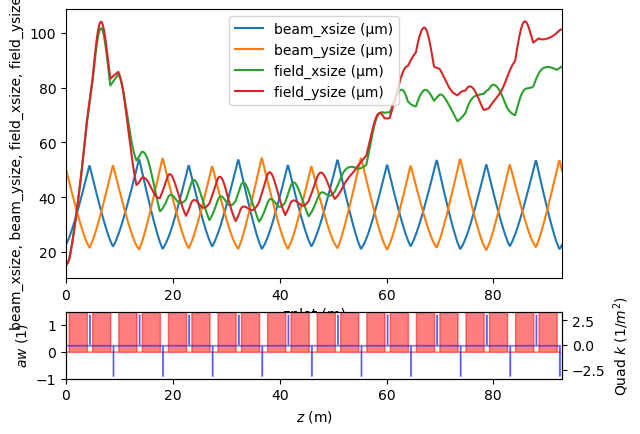

In [4]:
G.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

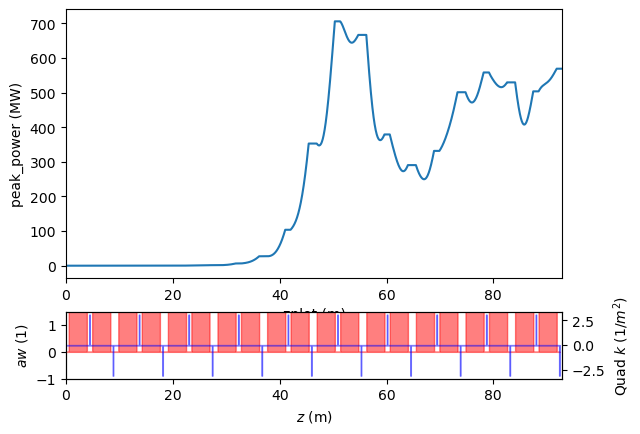

In [5]:
G.plot(["field_power"])

### Beam and field sizes

In [7]:
import matplotlib.pyplot as plt

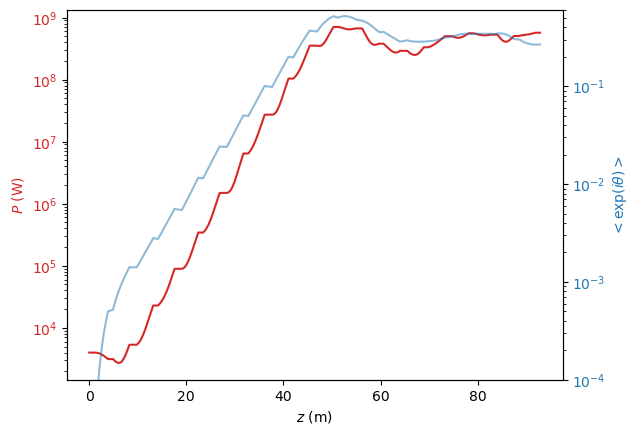

In [8]:
z = output.lattice.zplot
b = output.beam.bunching
p = output.field.power

fig, ax1 = plt.subplots()
color = "tab:red"
ax1.set_xlabel(r"$z$ (m)")
ax1.set_ylabel(r"$P$ (W)", color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.semilogy(z, p, color=color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel(r"$<\exp(i\theta)>$", color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.semilogy(z, b, color=color, alpha=0.5)
ax2.set_ylim([1e-4, 0.6])
plt.show()

In [21]:
import numpy as np

In [52]:
# Scan peak current

G_scan = G
current_list = np.linspace(500, 3000, 5)
scan_output = []

for current in current_list:
    G_scan.input.main.beam.current = current
    G_scan.verbose = False
    scan_output.append(G_scan.run())

[PC100405:77336] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/2861826048/sm_segment.PC100405.1062988918.aa940000.0 could be created.
[PC100405:77337] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/2033582080/sm_segment.PC100405.1062988918.79360000.0 could be created.
[PC100405:77338] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1744764928/sm_segment.PC100405.1062988918.67ff0000.0 could be created.
[PC100405:77339] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/2367553536/sm_segment.PC100405.1062988918.8d1e0000.0 could be created.
[PC100405:77340] shmem: mmap: an error occurred while determining whethe

In [55]:
import matplotlib.pyplot as plt

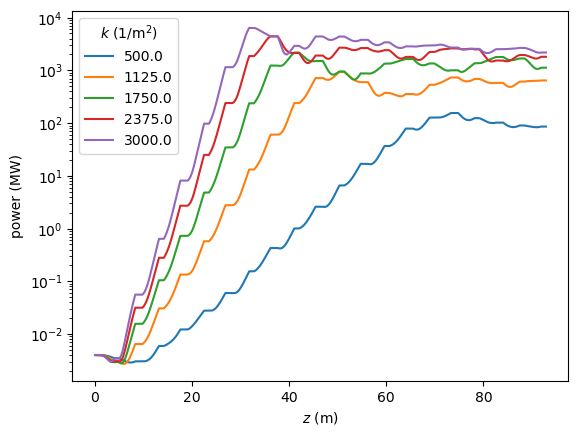

In [56]:
fig, ax = plt.subplots()
for k, g in zip(current_list, scan_output):
    x = g.stat("zplot")
    y = g.stat("power")
    ax.plot(x, y / 1e6, label=f"{k:0.1f}")
ax.set_yscale("log")
ax.set_xlabel(r"$z$ (m)")
ax.set_ylabel("power (MW)")
plt.legend(title=r"$k$ (1/m$^2$)")

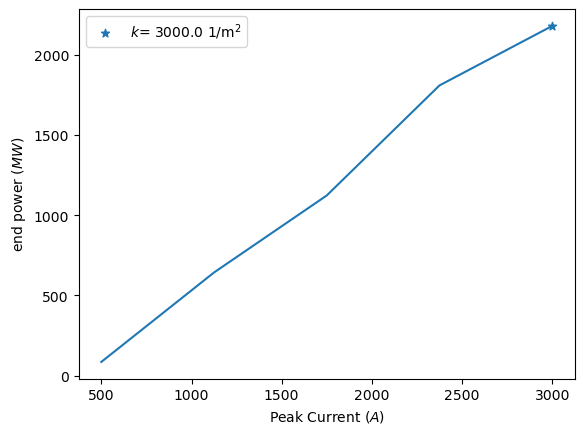

In [54]:
fig, ax = plt.subplots()
y = np.array([g.stat("power")[-1] for g in scan_output])
ixbest = y.argmax()
Gbest = scan_output[ixbest]
current_best = current_list[ixbest]
ybest = y[ixbest]
ax.plot(current_list, y / 1e6)
ax.scatter(current_best, ybest / 1e6, marker="*", label=rf"$k$= {current_best:0.1f} 1/m$^2$")
ax.set_ylabel(r"end power $(MW)$")
ax.set_xlabel(r"Peak Current $(A)$")
plt.legend()

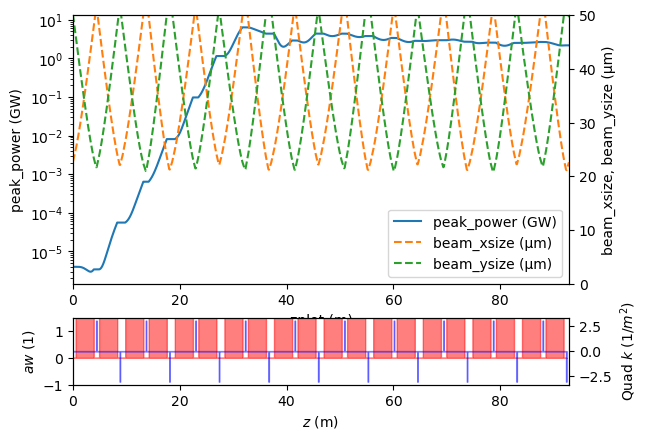

In [57]:
G_scan.plot("power", yscale="log", y2=["beam_xsize", "beam_ysize"], ylim2=(0, 50e-6))

In [ ]:
# try some taper

G_taper1 = Genesis4("examples/lcls-II.in")
G_taper1.verbose = True
G_taper1.input